<h1 style="color:navy;">Team members</h1>
<p style="font-weight: bold; font-size:18px;">1- Omar Ashraf Abdul-qader</p>
<p style="font-weight: bold; font-size:18px;">2- Abdulrhman Rashwan</p>

<h1 style="color:#023e8a;">Project Overview and dataset</h1>
<p style="font-weight: bold; font-size:18px; color:#219ebc;">Australian Vehicle Price Prediction
, You can view and download the dataset from <a href = https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset> Hotel </a>
<br> 
The main objective of this task is to train a model to predict a vehicle price given some features about the vehicle.</p>

<h2 style="color:navy;">Reading dataset</h2>

In [115]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
data = pd.read_csv('/kaggle/input/australian-vehicle-prices/Australian Vehicle Prices.csv',na_values=['POA', '-', '- / -'],)
data.drop(columns=['Brand', 'Model', 'Car/Suv', 'Title', 'ColourExtInt', 'Location'], inplace=True)
data.head(5)

,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,2022.0,DEMO,Automatic,"4 cyl, 2.2 L",AWD,Diesel,8.7 L / 100 km,5595.0,4 cyl,SUV,4 Doors,7 Seats,51990.0
1,2022.0,USED,Automatic,"4 cyl, 1.5 L",Front,Premium,6.7 L / 100 km,16.0,4 cyl,Hatchback,5 Doors,5 Seats,19990.0
2,2022.0,USED,Automatic,"4 cyl, 2 L",Rear,Premium,6.6 L / 100 km,8472.0,4 cyl,Coupe,2 Doors,4 Seats,108988.0
3,2011.0,USED,Automatic,"8 cyl, 5.5 L",Rear,Premium,11 L / 100 km,136517.0,8 cyl,Coupe,2 Doors,4 Seats,32990.0
4,2022.0,USED,Automatic,"4 cyl, 1.3 L",Front,Unleaded,6 L / 100 km,1035.0,4 cyl,SUV,4 Doors,5 Seats,34990.0


<h3 style="color:navy;">Helper function to extract numbers from string columns</h3>

In [2]:
def extract_number(data: 'pd.DataFrame', 
                  col: 'str', 
                  pattern: 'str') -> 'pd.Series':
    '''
    Extracts a number using the given regex pattern from the given data and col, 
    converts the result to float, and returns the result as a pd.Series.
    '''
    return data[col].str.extract(pattern, expand=False).astype('float32')

<h3 style="color:navy;">We use the previous hepler function to extract numbers from string columns</h3>

In [3]:
data['Engine'] = extract_number(data, col='Engine', pattern=r'.*?(\d+\.?\d*) L')
data['FuelConsumption'] = extract_number(data, col='FuelConsumption', pattern=r'(\d+\.?\d*) L.*')
data['CylindersinEngine'] = extract_number(data, col='CylindersinEngine', pattern=r'(\d+) (?:cyl|L)')
data['Doors'] = extract_number(data, col='Doors', pattern=r'(\d+) Doors')
data['Seats'] = extract_number(data, col='Seats', pattern=r'(\d+) Seats')

data.head()

,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,2022.0,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0
1,2022.0,USED,Automatic,1.5,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0
2,2022.0,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0
3,2011.0,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0
4,2022.0,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0


# Data Analysis
Examine the dataset and answer the following questions:
1. How many samples and features does this dataset contain?
2. What is the target column?
3. What is the data type of each column?
4. Which columns are numeric? Which columns are categorical?
5. Does this dataset contain missing values?

<h3 style="color:navy;">The Numbers of samples and features</h3>

In [4]:
num_samples = data.shape[0] 
num_features = data.shape[1]

print(f'Number of samples : {num_samples}')
print(f'Number of features : {num_features}')

Number of samples : 16734
Number of features : 13


<h3 style="color:navy;">Target column</h3>

In [5]:
selected_column = 'Price'
print(f"Column Name: {selected_column}")
print(data[selected_column])

Column Name: Price
0         51990.0
1         19990.0
2        108988.0
3         32990.0
4         34990.0
           ...   
16729     29500.0
16730     39888.0
16731     35280.0
16732     41888.0
16733     65888.0
Name: Price, Length: 16734, dtype: float64


<h3 style="color:navy;">Data type</h3>

In [6]:
data.dtypes

Year                 float64
UsedOrNew             object
Transmission          object
Engine               float32
DriveType             object
FuelType              object
FuelConsumption      float32
Kilometres           float64
CylindersinEngine    float32
BodyType              object
Doors                float32
Seats                float32
Price                float64
dtype: object

<h3 style="color:navy;">Numeric columns and Categorical columns</h3>

In [7]:
numeric_columns = data.select_dtypes(include=['float64', 'float32']).columns.tolist()
categorical_columns = data.select_dtypes(exclude=['float64', 'float32']).columns.tolist()

print("Numeric Columns:")
print(numeric_columns)

print("\nCategorical Columns:")
print(categorical_columns)

Numeric Columns:
['Year', 'Engine', 'FuelConsumption', 'Kilometres', 'CylindersinEngine', 'Doors', 'Seats', 'Price']

Categorical Columns:
['UsedOrNew', 'Transmission', 'DriveType', 'FuelType', 'BodyType']


<h3 style="color:navy;">Missing values</h3>
<p style="color:green;font-size:18px;">Columns With nan_value:</p>

In [10]:
data.isnull().sum()

Year                    1
UsedOrNew               1
Transmission          252
Engine               1676
DriveType               1
FuelType              638
FuelConsumption      1698
Kilometres            592
CylindersinEngine    1675
BodyType              282
Doors                1675
Seats                1705
Price                  53
dtype: int64

In [8]:
mask = data.isnull().any(axis=0)
cols_with_nan = data.columns[mask]
data[cols_with_nan]

,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,2022.0,DEMO,Automatic,2.2,AWD,Diesel,8.7,5595.0,4.0,SUV,4.0,7.0,51990.0
1,2022.0,USED,Automatic,1.5,Front,Premium,6.7,16.0,4.0,Hatchback,5.0,5.0,19990.0
2,2022.0,USED,Automatic,2.0,Rear,Premium,6.6,8472.0,4.0,Coupe,2.0,4.0,108988.0
3,2011.0,USED,Automatic,5.5,Rear,Premium,11.0,136517.0,8.0,Coupe,2.0,4.0,32990.0
4,2022.0,USED,Automatic,1.3,Front,Unleaded,6.0,1035.0,4.0,SUV,4.0,5.0,34990.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16729,2014.0,USED,Automatic,NaN,Front,Unleaded,NaN,66000.0,NaN,Commercial,NaN,NaN,29500.0
16730,2012.0,USED,Automatic,NaN,Rear,Diesel,NaN,117432.0,NaN,NaN,NaN,NaN,39888.0
16731,2022.0,DEMO,Automatic,1.6,Front,Unleaded,6.2,5165.0,4.0,SUV,4.0,5.0,35280.0
16732,2016.0,USED,Automatic,2.0,AWD,Premium,7.2,85525.0,4.0,SUV,4.0,5.0,41888.0


In [91]:
data['BodyType'].mode()

0    SUV
Name: BodyType, dtype: object

In [95]:
import math
selected_column = 'Year'
col_means = data[selected_column].mean()
col_means_int = math.floor(col_means)
print(col_means_int)
col_means_price = data['Price'].mean()
col_means_price_int= math.floor(col_means_price)
col_means_price_int

2016


37303

In [96]:
data_clean=data.fillna({'Year' : col_means_int,'UsedOrNew' : 'USED','Transmission':'Automatic','DriveType':'Front', 'BodyType': 'SUV','Price':col_means_price_int})


In [97]:
data_clean.isnull().sum() 

Year                    0
UsedOrNew               0
Transmission            0
Engine               1676
DriveType               0
FuelType              638
FuelConsumption      1698
Kilometres            592
CylindersinEngine    1675
BodyType                0
Doors                1675
Seats                1705
Price                   0
dtype: int64

In [104]:
mask=data_clean.isnull().any(axis=1)
num=mask.sum()
num / len(data_clean)

0.1433608222779969

In [102]:
mask=data_clean.isnull().any(axis=1)
data_clean_all = data_clean[~mask]
data_clean_all.isnull().sum() 

Year                 0
UsedOrNew            0
Transmission         0
Engine               0
DriveType            0
FuelType             0
FuelConsumption      0
Kilometres           0
CylindersinEngine    0
BodyType             0
Doors                0
Seats                0
Price                0
dtype: int64

In [109]:
print(data_clean_all['Year'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['UsedOrNew'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Transmission'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Engine'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['DriveType'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['FuelType'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['FuelConsumption'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Kilometres'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['CylindersinEngine'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['BodyType'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Doors'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Seats'].unique())
print('-------------------------------------------------------------------')
print(data_clean_all['Price'].unique())

[2022. 2011. 2017. 2000. 2013. 2014. 2018. 2016. 2012. 2023. 2005. 2015.
 2019. 2021. 2007. 2010. 2003. 2008. 2006. 2009. 2020. 1999. 2004. 2002.
 1995. 2001. 1985. 1998. 1997. 1986. 1996. 1994. 1990. 1993. 1991. 1989.
 1984. 1978. 1992.]
-------------------------------------------------------------------
['DEMO' 'USED' 'NEW']
-------------------------------------------------------------------
['Automatic' 'Manual']
-------------------------------------------------------------------
[2.2 1.5 2.  5.5 1.3 1.6 2.7 3.  1.4 1.  2.4 2.5 1.2 1.8 4.  3.5 3.2 6.
 2.3 4.1 3.6 4.8 3.8 3.3 4.2 2.8 4.5 6.6 3.7 2.1 4.4 5.  1.9 0.  5.7 0.9
 6.2 4.7 1.7 4.6 6.4 2.9 5.4 6.8 5.6 5.3 4.9 7.3 4.3 3.1 2.6 6.3 3.4 3.9
 6.1 6.5 5.9 0.7 5.2]
-------------------------------------------------------------------
['AWD' 'Front' 'Rear' '4WD' 'Other']
-------------------------------------------------------------------
['Diesel' 'Premium' 'Unleaded' 'Hybrid' 'Electric' 'LPG' 'Leaded']
--------------------------------

In [124]:
data_clean_all_1=data_clean_all.replace({
    'UsedOrNew':{'DEMO':0, 'USED':1, 'NEW':2},
    'Transmission':{'Automatic':0, 'Manual':1},
    'DriveType':{'AWD':0, 'Front':1, 'Rear':2, '4WD':3, 'Other':4},
    'FuelType':{'Diesel':0, 'Premium':1, 'Unleaded':2, 'Hybrid':3, 'Electric':4, 'LPG':5, 'Leaded':6},
    'BodyType':{'SUV':0, 'Hatchback':1, 'Coupe':2, 'Commercial':3, 'Ute / Tray':4, 'Sedan':5, 'People Mover':6, 'Convertible':7, 'Wagon':8, 'Other':9},
})
data_clean_all_1.head(20)

,Year,UsedOrNew,Transmission,Engine,DriveType,FuelType,FuelConsumption,Kilometres,CylindersinEngine,BodyType,Doors,Seats,Price
0,2022.0,0,0,2.2,0,0,8.7,5595.0,4.0,0,4.0,7.0,51990.0
1,2022.0,1,0,1.5,1,1,6.7,16.0,4.0,1,5.0,5.0,19990.0
2,2022.0,1,0,2.0,2,1,6.6,8472.0,4.0,2,2.0,4.0,108988.0
3,2011.0,1,0,5.5,2,1,11.0,136517.0,8.0,2,2.0,4.0,32990.0
4,2022.0,1,0,1.3,1,2,6.0,1035.0,4.0,0,4.0,5.0,34990.0
6,2017.0,1,0,2.0,0,0,5.1,67662.0,4.0,0,2.0,4.0,62280.0
7,2000.0,1,0,1.6,1,2,8.0,300539.0,4.0,1,5.0,5.0,2995.0
8,2013.0,1,0,2.0,2,1,7.1,82012.0,4.0,2,2.0,4.0,24888.0
9,2014.0,1,0,1.3,1,3,4.5,38229.0,4.0,1,5.0,5.0,17900.0
11,2018.0,1,0,2.7,2,2,9.8,16324.0,4.0,3,4.0,2.0,41999.0


In [125]:
data_input = data_clean_all_1.drop(columns=['Price'])
data_output = data_clean_all_1['Price']

In [126]:
from sklearn.model_selection import train_test_split

X, X_test, y, y_test = train_test_split(data_input, data_output, random_state=0, test_size=.30)

X_train,X_val, y_train, y_val = train_test_split(X, y, random_state=0, test_size=0.3)

print('X_train: ', X_train.shape)
print('y_train: ', y_train.shape)
print('-'*50)
print('X_val', X_val.shape)
print('y_val', y_val.shape)
print('-'*50)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train:  (7023, 12)
y_train:  (7023,)
--------------------------------------------------
X_val (3011, 12)
y_val (3011,)
--------------------------------------------------
X_test (4301, 12)
y_test (4301,)


In [127]:
from sklearn.metrics import r2_score
#from sklearn.metrics import mean_squared_error

def eval_model(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_val = model.predict(X_val)
    r2_train = r2_score(y_train, y_pred_train)
    r2_val = r2_score(y_val, y_pred_val)
    return r2_train, r2_val

In [128]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
eval_model(linear_reg, X_train, y_train, X_val, y_val)

(0.42359013101411114, 0.439002284401082)

In [130]:
import math
math.sqrt(0.439002284401082)

0.6625724748290424

In [132]:
from sklearn.preprocessing import PolynomialFeatures

# first, we create an object of PolynomialFeatures transformer
pf = PolynomialFeatures(degree=2)

# then we transform our features
X_train_poly = pf.fit_transform(X_train)
X_val_poly = pf.transform(X_val)
X_test_poly = pf.transform(X_test)

# finally we use the polynomial features with a linear regression model
nonlinear_reg = LinearRegression()
eval_model(nonlinear_reg, X_train_poly, y_train, X_val_poly, y_val)

(0.6902748354291214, 0.629327484905112)

In [134]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
nonlinear_reg = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression()),
])

eval_model(nonlinear_reg, X_train, y_train, X_val, y_val)

(0.6903462159226308, 0.6293401427635027)

In [135]:
degree_values = list(range(1, 6))
r2_train_values = []
r2_val_values = []

for degree in degree_values:
    nonlinear_reg = Pipeline([
        ('feature_scaling', StandardScaler()),
        ('polynomial_features', PolynomialFeatures(degree=degree)),
        ('regression', LinearRegression()),
    ])
    r2_train, r2_val = eval_model(nonlinear_reg, X_train, y_train, X_val, y_val)
    r2_train_values.append(r2_train)
    r2_val_values.append(r2_val)

results = pd.DataFrame({
    'degree': degree_values,
    'r2_train': r2_train_values,
    'r2_val': r2_val_values,
})

results

,degree,r2_train,r2_val
0,1,0.423590,4.390023e-01
1,2,0.690346,6.293401e-01
2,3,0.841419,-2.559660e+15
3,4,0.941654,-4.574713e+13
4,5,0.981288,-4.004154e+16


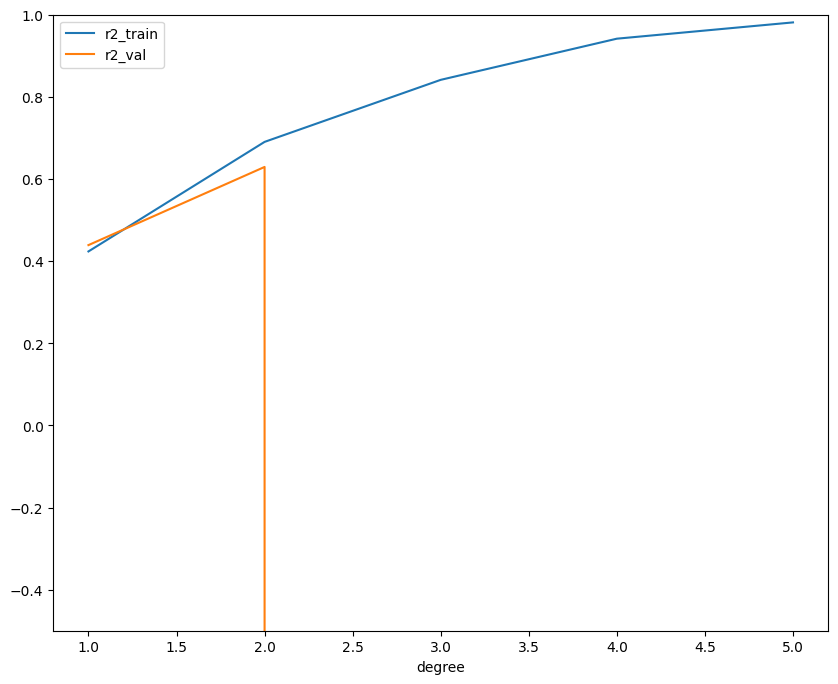

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

results.plot(x='degree', y=['r2_train', 'r2_val'], figsize=(10, 8))
plt.ylim(-0.5, 1)
#plt.grid(axis='both')
plt.show()

In [146]:
model_best = Pipeline([
    ('feature_scaling', StandardScaler()),
    ('polynomial_features', PolynomialFeatures(degree=2)),
    ('regression', LinearRegression()),
])
model_best.fit(X_train, y_train)
y_pred_test = model_best.predict(X_test)
r2_score(y_test, y_pred_test)

0.6666587922609535

In [147]:
y_test.max()

649880.0

In [148]:
y_pred_test.max()

408578.15625

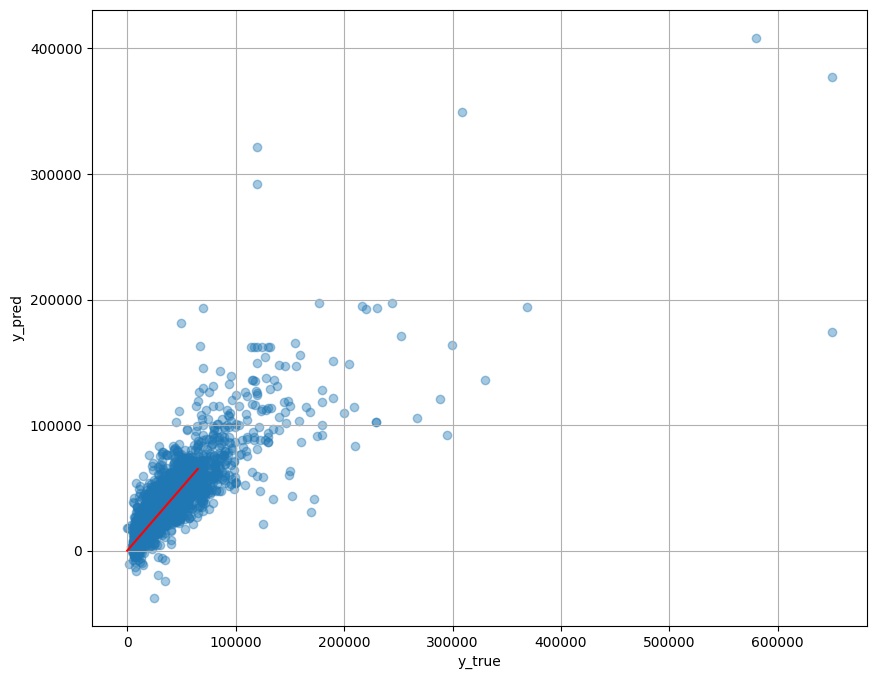

In [149]:
plt.figure(figsize=(10, 8))
plt.scatter(y_test, y_pred_test, alpha=0.4)
plt.plot([0, 65000], [0, 65000], c='red')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.grid(axis='both')
plt.show()

# Answer the following questions:
## 1. What is the $R^2$ value for the training set?
### =0.42359013101411114

## 2. What is the $R^2$ value for the test set?
### =0.6666587922609535

## 3. Does this model overfit the training set? Why/why not?
### =No, because the model training and validation not equal 1 so thats mean the model doesnot save exactly answer but learn 

## 4. Does this model underfit the training set? Why/why not?
### =No, because the model give some correct answer
